<a href="https://colab.research.google.com/github/GuilhermeCarv/Brasileirao/blob/main/Brasileirao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
!pip install pywaffle
from pywaffle import Waffle


In [199]:
df = pd.read_csv("https://raw.githubusercontent.com/GuilhermeCarv/Brasileirao/main/brasileirao_serie_a.csv")

In [200]:
df.head()

,ano_campeonato,data,horario,rodada,estadio,arbitro,publico,publico_max,time_man,time_vis,...,chutes_bola_parada_man,chutes_bola_parada_vis,defesas_man,defesas_vis,impedimentos_man,impedimentos_vis,chutes_man,chutes_vis,chutes_fora_man,chutes_fora_vis
0,2003,2003-03-29,08:00,1,Estádio Brinco de Ouro da Princesa,NaN,NaN,NaN,Guarani,Vasco da Gama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003,2003-03-29,08:00,1,Arena da Baixada,NaN,NaN,NaN,Atlético-PR,Grêmio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,2003-03-30,09:00,1,Estádio Jornalista Mário Filho,NaN,NaN,NaN,Flamengo,Coritiba FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,2003-03-30,09:00,1,Estádio de Hailé Pinheiro,NaN,NaN,NaN,Goiás EC,Paysandu SC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,2003-03-30,09:00,1,Estádio Beira-Rio,NaN,NaN,NaN,Internacional,Ponte Preta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

chutes_fora_vis             0.892888
defesas_man                 0.892888
chutes_bola_parada_man      0.892888
faltas_vis                  0.892888
faltas_man                  0.892888
escanteios_vis              0.892888
escanteios_man              0.892888
defesas_vis                 0.892888
impedimentos_man            0.892888
chutes_bola_parada_vis      0.892888
chutes_man                  0.892888
chutes_fora_man             0.892888
chutes_vis                  0.892888
impedimentos_vis            0.892888
publico_max                 0.604125
idade_media_titular_man     0.298720
idade_media_titular_vis     0.298720
tecnico_vis                 0.298435
tecnico_man                 0.298435
valor_equipe_titular_vis    0.298435
valor_equipe_titular_man    0.298435
gols_1_tempo_man            0.244666
gols_1_tempo_vis            0.244666
publico                     0.243385
arbitro                     0.243243
colocacao_vis               0.243243
colocacao_man               0.243243
e

In [202]:
#retirando colunas que não serão utilizadas na análise
df.drop(['chutes_fora_vis', 'defesas_man','chutes_bola_parada_man','faltas_vis','faltas_man',
        'escanteios_vis','escanteios_man','defesas_vis','impedimentos_man','chutes_bola_parada_vis','chutes_man','chutes_fora_man',
        'chutes_vis','impedimentos_vis','publico_max','idade_media_titular_man','idade_media_titular_vis','valor_equipe_titular_man','valor_equipe_titular_vis','horario', 'publico'] , axis =1, inplace = True)


In [203]:
df.head()

,ano_campeonato,data,rodada,estadio,arbitro,time_man,time_vis,tecnico_man,tecnico_vis,colocacao_man,colocacao_vis,gols_man,gols_vis,gols_1_tempo_man,gols_1_tempo_vis
0,2003,2003-03-29,1,Estádio Brinco de Ouro da Princesa,NaN,Guarani,Vasco da Gama,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN
1,2003,2003-03-29,1,Arena da Baixada,NaN,Atlético-PR,Grêmio,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
2,2003,2003-03-30,1,Estádio Jornalista Mário Filho,NaN,Flamengo,Coritiba FC,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,2003,2003-03-30,1,Estádio de Hailé Pinheiro,NaN,Goiás EC,Paysandu SC,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
4,2003,2003-03-30,1,Estádio Beira-Rio,NaN,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


In [204]:
#Contabilizando número de rodadas de cada time que já jogou o Brasileirão
(df['time_man'].value_counts() + df['time_vis'].value_counts()).sort_values(ascending = False)

São Paulo         684
Fluminense        684
Flamengo          684
Santos FC         684
Grêmio            646
Atlético-MG       646
Cruzeiro          646
Corinthians       646
Internacional     646
Palmeiras         608
Botafogo          608
Vasco da Gama     570
Atlético-PR       570
Coritiba FC       494
Goiás EC          494
Figueirense FC    418
EC Vitória        380
Sport Recife      380
Ponte Preta       342
EC Bahia          342
Paraná            228
Avaí FC           228
Chapecoense       228
Náutico           190
Juventude         190
Fortaleza         190
Atlético-GO       190
Ceará SC          190
São Caetano       152
Criciúma EC       152
Guarani           114
Paysandu SC       114
Portuguesa        114
América-MG        114
Santa Cruz         76
Barueri            76
Athletico-PR       76
CSA                38
Brasiliense-DF     38
Ipatinga FC        38
RB Bragantino      38
Santo André        38
América-RN         38
Joinville-SC       38
dtype: int64

In [205]:
#Verificando a quantidade mais comum de gols marcados pelos mandantes
df.gols_man.value_counts()

1.0    2378
2.0    1803
0.0    1421
3.0     919
4.0     366
5.0     105
6.0      31
7.0       6
Name: gols_man, dtype: int64

In [206]:
df.gols_vis.value_counts()

0.0    2565
1.0    2519
2.0    1331
3.0     450
4.0     137
5.0      21
6.0       4
7.0       2
Name: gols_vis, dtype: int64

In [207]:
#Quantidade de gols ao longo de todos os campeonatos
(df.gols_man + df.gols_vis).sum()

18180.0

In [208]:
#Retirando o NaN do jogo Chapecoense x Atlético-MG
df['gols_man'].fillna(0, inplace = True)

In [209]:
#Gerando lista de todos os times que já jogaram o brasileirão
times = df['time_man'].unique()
times = times.tolist()

In [210]:
#Função para contabilizar a quantidade de gols feitos como mandante
vetor = []
def casa (lista):
  for time in lista:
   gols = df['gols_man'].loc[(df['time_man'] == time)].sum()
   vetor.append(gols)
  return vetor

#Função para contabilizar a quantidade de gols feitos como visitante
vetor_fora = []
def fora (lista):
  for time in lista:
   gols = df['gols_vis'].loc[(df['time_vis'] == time)].sum()
   vetor_fora.append(gols)
  return vetor_fora

#Função para contabilizar a quantidade de gols sofridos como mandante
aux = []
def contracasa (lista):
  for time in lista:
   gols = df['gols_vis'].loc[(df['time_man'] == time)].sum()
   aux.append(gols)
  return aux

#Função para contabilizar a quantidade de gols sofridos como visitante  
aux_fora = []
def contrafora (lista):
  for time in lista:
   gols = df['gols_man'].loc[(df['time_vis'] == time)].sum()
   aux_fora.append(gols)
  return aux_fora

In [211]:
#Aplicando as funções de contabilização de gols
gols = casa(times)
gols_fora = fora(times)
gols_casa_contra = contracasa(times)
gols_vis_fora = contrafora(times)

In [212]:
#Gerando DataFrame com os times e gols marcados e sofridos
consolidado = pd.DataFrame(times)
consolidado['gols_mandante'] = gols
consolidado['gols_fora'] = gols_fora
consolidado['gols_cedidos_casa'] = gols_casa_contra
consolidado['gols_cedidos_fora'] = gols_vis_fora
consolidado.rename(columns = {0 :'time'}, inplace = True)

In [213]:
#Somando as duas entradas do CAP existentes
CAP = consolidado.iloc[1] + consolidado.iloc[41]
consolidado = consolidado.append(CAP,ignore_index=True)

In [214]:
#Gerando saldos em casa e de gols a favor e contra
consolidado['saldo_casa'] = consolidado['gols_mandante'] - consolidado['gols_cedidos_casa']
consolidado['saldo_fora'] = consolidado['gols_fora'] - consolidado['gols_cedidos_fora']
consolidado['favor'] = consolidado['gols_mandante'] + consolidado['gols_fora']
consolidado['contra'] = consolidado['gols_cedidos_casa'] + consolidado['gols_cedidos_fora']

In [215]:
#Consertando o nome do CAP e retirando as outras duas entradas nao consolidadas
consolidado.loc[consolidado["time"] == "Atlético-PRAthletico-PR", "time"] = "Athletico-PR"
consolidado.drop([1,41],inplace = True)
consolidado.reset_index(inplace = True,drop = True)

In [216]:
#Gerando e adicionando lista de siglas dos times ao DataFrame
siglas = ['GUA','FLA','GOI','INT','CRC','JUV','FOR','CRU','VIT','SAN','COR','FLU','CAM','CFC','GRE','BAH','FIG','PSC','PON','PAR','SCA','SAO','VAS','BOT','PAL','BRA','SCF','ARN','SPT','NAU','IPT','POR','AVC','STA','BAR','ACG','CEA','AME','CHA','JEC','CSA','BRA','CAP']
consolidado['sigla'] = siglas

In [217]:
#Ordenando os times por gols marcados em casa e gols marcados fora
casa = consolidado.groupby("time",as_index=False).sum().sort_values(by='gols_mandante')
fora = consolidado.groupby("time",as_index=False).sum().sort_values(by='gols_fora')

In [218]:
#Ordenando DataFrame pelo nome dos times
consolidado = consolidado.sort_values(by= 'time',ignore_index=True)

In [219]:
#Gerando DataFrame com o número de rodadas jogadas por cada time
rodadas = (df['time_man'].value_counts() + df['time_vis'].value_counts()).sort_values(ascending = False)
rodadas = pd.DataFrame(data = rodadas,columns=['rodada'])
rodadas = rodadas.reset_index(level=0)
rodadas.rename(columns = {'index':'times'},inplace = True)
rodadas = rodadas.sort_values(by='times',ignore_index=True)

In [220]:
#Aplicando a correção do CAP
CAP_rod = rodadas.iloc[2] + rodadas.iloc[5]
rodadas = rodadas.append(CAP_rod,ignore_index=True)
rodadas = rodadas.sort_values(by='times',ignore_index=True)
rodadas.loc[rodadas["times"] == "Athletico-PRAtlético-PR", "times"] = "Athletico-PR"
rodadas.drop([2,6],inplace = True)
rodadas.reset_index(inplace = True,drop = True)

In [221]:
#Adicionando o número de rodadas ao DataFrame
consolidado['numero_rodadas'] = rodadas['rodada']

#Gerando um dado normalizado de gols feitos e sofridos por rodada jogada
consolidado['normal_favor'] = consolidado['favor']/consolidado['numero_rodadas']
consolidado['normal_contra'] = consolidado['contra']/consolidado['numero_rodadas']

#Gerando um fator entre gols feitos e gols sofridos
consolidado['fator'] = consolidado['normal_favor']/consolidado['normal_contra']

In [222]:
#Número de gols do time mandante
casa['gols_mandante'].sum()

10958.0

In [223]:
casa['gols_fora'].sum()

7222.0

In [224]:
consolidado.sort_values('fator', ascending = False)

,time,gols_mandante,gols_fora,gols_cedidos_casa,gols_cedidos_fora,saldo_casa,saldo_fora,favor,contra,sigla,numero_rodadas,normal_favor,normal_contra,fator
41,São Paulo,581.0,420.0,292.0,443.0,289.0,-23.0,1001.0,735.0,SAO,684,1.463450,1.074561,1.361905
23,Grêmio,557.0,329.0,280.0,417.0,277.0,-88.0,886.0,697.0,GRE,646,1.371517,1.078947,1.271162
35,RB Bragantino,34.0,16.0,19.0,21.0,15.0,-5.0,50.0,40.0,BRA,38,1.315789,1.052632,1.250000
38,Santos FC,626.0,391.0,319.0,496.0,307.0,-105.0,1017.0,815.0,SAN,684,1.486842,1.191520,1.247853
12,Corinthians,489.0,351.0,291.0,392.0,198.0,-41.0,840.0,683.0,COR,646,1.300310,1.057276,1.229868
25,Internacional,519.0,345.0,272.0,439.0,247.0,-94.0,864.0,711.0,INT,646,1.337461,1.100619,1.215190
30,Palmeiras,523.0,344.0,308.0,411.0,215.0,-67.0,867.0,719.0,PAL,608,1.425987,1.182566,1.205841
15,Cruzeiro,569.0,369.0,343.0,441.0,226.0,-72.0,938.0,784.0,CRU,646,1.452012,1.213622,1.196429
19,Flamengo,569.0,382.0,331.0,488.0,238.0,-106.0,951.0,819.0,FLA,684,1.390351,1.197368,1.161172
4,Atlético-MG,563.0,375.0,353.0,504.0,210.0,-129.0,938.0,857.0,CAM,646,1.452012,1.326625,1.094516


In [225]:
#Gerando gráfico de barras
fig = px.bar(casa, x='time', y='gols_mandante',
             color='gols_mandante',color_continuous_scale='greens', 
             text_auto='.3s',
             labels = {'time':"Time",
                        'gols_mandante': 'Gols'}
             )
#Gerando números no topo das barras
fig.update_traces(textfont_size=30, textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)

#Alterando títulos do gráfico e dos eixos
fig.update_layout(plot_bgcolor = '#FFFFFF',
                  title_text = "<b>Gols marcados em casa desde 2003</b>",
                  title_x = 0.5,
                  title_font_family="Lato",
                  title_font_size=24,
                  title_font_color="#94001A",
                  xaxis={"title":""},
                  yaxis={"title":"<b>Gols"}
                  )
#Formatando o eixo X
fig.update_xaxes(linecolor = "#ffffff",tickfont=dict(family='Lato', size=22))
#Formatando o eixo Y
fig.update_yaxes(linecolor = "#444",title_font_color="#94001A",title_font_family="Lato",title_font_size=20)
#Retirando legenda de cores
fig.update(layout_coloraxis_showscale=False)
#Inclinando legendas do eixo X
fig.update_xaxes(tickangle=45)

fig.show()

In [226]:
#Gerando gráfico de barras
fig = px.bar(fora, x='time', y='gols_fora',
             color='gols_fora',color_continuous_scale='greens', 
             text_auto='.3s',
             labels = {'time':"Time",
                        'gols_fora': 'Gols'}
             )

#Alterando títulos do gráfico e dos eixos                 
fig.update_layout(plot_bgcolor = '#FFFFFF',
                  title_text = "<b>Gols marcados fora de casa desde 2003</b>",
                  title_x = 0.5,
                  title_font_family="Lato",
                  title_font_size=24,
                  title_font_color="#94001A",
                  xaxis={"title":""},
                  yaxis={"title":"<b>Gols"}
                  )

#Gerando números no topo das barras
fig.update_traces(textfont_size=30, textangle=0, 
                  textposition="outside",
                  cliponaxis=False)

#Formatando o eixo X
fig.update_xaxes(linecolor = "#ffffff",tickfont=dict(family='Lato', size=22))
#Formatando o eixo Y
fig.update_yaxes(linecolor = "#444",title_font_color="#94001A",title_font_family="Lato",title_font_size=20)
#Retirando legenda de cores
fig.update(layout_coloraxis_showscale=False)
#Inclinando legendas do eixo X
fig.update_xaxes(tickangle=45)

fig.show()

In [227]:
#Reordenando as colunas do DataFrame
consolidado = consolidado[['time','sigla','numero_rodadas','gols_mandante','gols_fora','gols_cedidos_casa','gols_cedidos_fora','saldo_casa','saldo_fora','favor','contra','normal_favor','normal_contra','fator']]

In [228]:
#Gerando scatter plot
fig = px.scatter(consolidado, x='normal_contra', y='normal_favor',
                 #size ='favor',
                 hover_data = {'normal_favor':True, 'normal_contra':True, 'time':True,'sigla':False,'fator':False},
                 text = 'sigla',
                 color = 'fator',
                 color_continuous_scale='greens', 
                 labels = {'normal_favor':"Gols Marcados",
                          'normal_contra':'Gols Sofridos',
                          'fator':'Fator de aproveitamento',
                          'time': 'Time'}
             )
#Adicionando legendas as marcações do scatter
fig.update_traces(textposition="top right",
                  marker=dict(size=8,
                              line=dict(width=2,
                                        color='#1b3333')
                                        ),
                  )
#Alterando títulos do gráfico e dos eixos
fig.update_layout(plot_bgcolor="#ffffff",
                  title_text = "<b>Qual o time mais efetivo?",
                  title_x = 0.5,
                  title_font_family="Lato",
                  title_font_color="#94001A",
                  xaxis={"title":"<b>Gols cedidos por rodada"},
                  yaxis={"title":"<b>Gols feitos por rodada"})

#Adicionando linhas pontilhadas
fig.add_vline(x=consolidado['normal_contra'].mean(), line_width=1, line_dash="dash", line_color="#1b3333")
fig.add_hline(y=consolidado['normal_favor'].mean(), line_width=1, line_dash="dash", line_color="#1b3333")

#Adicionando anotação superior
fig.add_annotation(text="<b>Mais efetivos",
                  xref="paper", yref="paper",
                  x=0.8, y=1.05, showarrow=False,
                  font=dict(
                            family="Lato",
                            size=14,
                            color="#94001A"
                            ),
                  align="center",
                  bgcolor="#f7f7f7",
                  opacity=0.8)

#Adicionando anotação inferior
fig.add_annotation(text="<b>Menos efetivos",
                  xref="paper", yref="paper",
                  x=0.2, y=0.2, showarrow=False,
                  font=dict(
                            family="Lato",
                            size=14,
                            color="#94001A"
                            ),
                  align="center",
                  bgcolor="#f7f7f7",
                  opacity=0.8)

#Formatando o eixo X
fig.update_xaxes(linecolor = "#444",range = (0,2.2),autorange="reversed",title_font_color="#94001A",title_font_family="Lato",title_font_size=14)
#Formatando o eixo Y
fig.update_yaxes(linecolor = "#444",range = (0,1.6),title_font_color="#94001A",title_font_family="Lato",title_font_size=14)
#Retirando legenda de cores
fig.update(layout_coloraxis_showscale=False)

fig.show()

In [229]:
#Função para pegar dados dos times campeões
def campeao (time,ano):
  saida = df.loc[((df['time_man'] == time) | (df['time_vis'] == time)) & (df['ano_campeonato'] == ano)]
  return saida

In [230]:
#Função para calcular saldo
def saldo (df,time):
  saldo = (df['gols_man'].loc[(df['time_man'] == time)].sum()) +(df['gols_vis'].loc[(df['time_vis'] == time)].sum()) - (df['gols_man'].loc[(df['time_vis'] == time)].sum()) -(df['gols_vis'].loc[(df['time_man'] == time)].sum())
  return saldo

In [231]:
#Aplicando função campeão
cru2003 = campeao ("Cruzeiro", 2003)
san2004 = campeao("Santos FC",2004)
cor2005 = campeao ("Corinthians", 2005)
sp2006 = campeao("São Paulo", 2006)
sp2007 = campeao ("São Paulo", 2007)
sp2008 = campeao ("São Paulo", 2008)
fla2009 = campeao ("Flamengo", 2009)
flu2010 = campeao ("Fluminense", 2010)
cor2011 = campeao ("Corinthians", 2011)
flu2012 = campeao ("Fluminense", 2012)
cru2013 = campeao ("Cruzeiro", 2013)
cru2014 = campeao ("Cruzeiro", 2014)
cor2015 = campeao ("Corinthians", 2015)
pal2016 = campeao ("Palmeiras", 2016)
cor2017 = campeao ("Corinthians", 2017)
pal2018 = campeao ("Palmeiras", 2018)
fla2019 = campeao ("Flamengo", 2019)
fla2020 = campeao ("Flamengo", 2020)


In [232]:
#Aplicando função saldo
saldo2003 = saldo(cru2003, "Cruzeiro")
saldo2004 = saldo(san2004,"Santos FC")
saldo2005 = saldo(cor2005, "Corinthians")
saldo2006 = saldo(sp2006, "São Paulo")
saldo2007 = saldo(sp2007, "São Paulo")
saldo2008 = saldo(sp2008, "São Paulo")
saldo2009 = saldo(fla2009, "Flamengo")
saldo2010 = saldo(flu2010, "Fluminense")
saldo2011 = saldo(cor2011, "Corinthians")
saldo2012 = saldo(flu2012, "Fluminense")
saldo2013 = saldo(cru2013, "Cruzeiro")
saldo2014 = saldo(cru2014, "Cruzeiro")
saldo2015 = saldo(cor2015, "Corinthians")
saldo2016 = saldo(pal2016, "Palmeiras")
saldo2017 = saldo(cor2017, "Corinthians")
saldo2018 = saldo(pal2018, "Palmeiras")
saldo2019 = saldo(fla2019, "Flamengo")
saldo2020 = saldo(fla2020, "Flamengo")

In [233]:
#Gerando lista com os anos de campeonato
anos = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

#Transformando saldos em DataFrame
df_saldo = pd.DataFrame(data = [saldo2003,saldo2004,saldo2005,saldo2006,saldo2007,saldo2008,saldo2009,saldo2010,saldo2011,saldo2012,saldo2013,saldo2014,saldo2015,saldo2016,saldo2017,saldo2018,saldo2019,saldo2020], columns = ["saldo"])

#Gerando lista com o nome dos campeões
campeoes = ["Cruzeiro","Santos","Corinthians",'São Paulo','São Paulo','São Paulo','Flamengo','Fluminense','Corinthians','Fluminense','Cruzeiro','Cruzeiro','Corinthians','Palmeiras','Corinthians','Palmeiras','Flamengo','Flamengo']

#Adicionando dados ao DataFrame de saldos e reordenando as colunas
df_saldo['times'] = campeoes
df_saldo['ano'] = anos
df_saldo = df_saldo[['times','ano','saldo']]

In [234]:
#Gerando gráfico de barras
fig = px.bar(df_saldo, x='ano', y = 'saldo', 
             text_auto = '.2s',
             color_discrete_sequence = ['#008F4A'],
             hover_data={'times':True, 'ano':False,'saldo':False},
             labels = {'times':"Time",})

#Alterando títulos do gráfico e dos eixos   
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                  title_text = "<b>Saldo de gols dos campeões de 2003 à 2020",
                  title_x = 0.5,
                  title_font_family="Lato",
                  title_font_size=24,
                  title_font_color="#94001A",
                  xaxis={"title":""},
                  yaxis={"title":"<b>Saldo de gols"})

#Adicionando anotação de tricampeonato
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=0.306,
    y=33,
    text="<b>Tricampeonato",
    axref="x domain",
    ayref="y",
    ax=0.306,
    ay=55,
    arrowhead=2,
    font=dict(
            family="Lato",
            size=20,
            color="#94001A"
            ),
        align="center"
)

#Adicionando anotação de bicampeonato
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=0.640,
    y=33,
    text="<b>Bicampeonato",
    axref="x domain",
    ayref="y",
    ax=0.640,
    ay=55,
    arrowhead=2,
    font=dict(
            family="Lato",
            size=20,
            color="#94001A"
            ),
        align="center"
)

#Adicionando anotação de bicampeonato no fim do gráfico
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=0.9725,
    y=23,
    text="<b>Bicampeonato",
    axref="x domain",
    ayref="y",
    ax=0.9725,
    ay=55,
    arrowhead=2,
    font=dict(
            family="Lato",
            size=20,
            color="#94001A"
            ),
        align="center"
)

#Adicionando anotação de bicampeonato no fim do gráfico
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=0.5,
    y=33,
    text="<b>Média",
    axref="x domain",
    ayref="y",
    ax=0.5,
    ay=33,
    arrowhead=2,
    font=dict(
            family="Lato",
            size=20,
            color="#94001A"
            ),
        align="center"
)

fig.add_hline(y= df_saldo['saldo'].mean(), line_width=1, line_dash="dash", line_color="#1b3333")

#Gerando números no topo das barras
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_xaxes(linecolor = "#ffffff",tickfont=dict(family='Lato', size=22, color="#94001A"))
#Formatando o eixo Y
fig.update_yaxes(linecolor = "#444",title_font_color="#94001A",title_font_family="Lato",title_font_size=20)

fig.show()

In [235]:
#Função para gerar pontuação
def pontos (df):
  if df['gols_man'] > df['gols_vis']:
    df['pontos_man'] = 3
    return df['pontos_man']
  if df['gols_man'] < df['gols_vis']:
    df['pontos_man'] = 0
    return df['pontos_man']
  else:
    df['pontos_man'] = 1
    return df['pontos_man']

def pontos_visitante (df):
  if df['gols_man'] > df['gols_vis']:
    df['pontos_vis'] = 0
    return df['pontos_vis']
  if df['gols_man'] < df['gols_vis']:
    df['pontos_vis'] = 3
    return df['pontos_vis']
  else:
    df['pontos_vis'] = 1
    return df['pontos_vis']

In [236]:
#Aplicando função de pontuação
df ['pontos_man'] = df.apply(pontos, axis = 1)
df ['pontos_vis'] = df.apply(pontos_visitante, axis = 1)

In [237]:
#Somando número de pontos de mandantes e visitantes
pontos_man = df['pontos_man'].sum()
pontos_vis = df['pontos_vis'].sum()

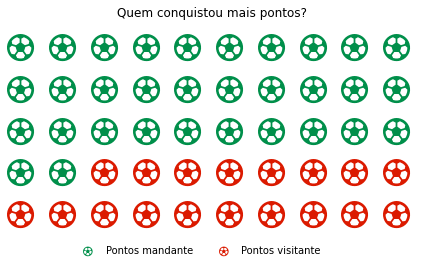

In [264]:
#Dados para o gráfico
data = {"Pontos mandante": pontos_man, "Pontos visitante": pontos_vis}
#Gerando gráfico Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=data,
      title={
        'label': 'Quem conquistou mais pontos?',
        'loc': 'center',
        'fontdict': {
                    'fontname':'Lato',
                    'size':12,
        }
    },
    legend={'loc': 'lower left', 'bbox_to_anchor': (0.15, -0.2),'ncol': len(data),'framealpha': 0},
    vertical=True,
    starting_location='NW',
    icons = "futbol",
    icon_style = "regular",
    icon_legend=True,
    colors = ['#008F4A','#DB1A00']
)
plt.show()

In [239]:
#Criando DataFrame auxiliar com dados de campeonato depois de 2007
df_aux = df.drop(df[df['ano_campeonato'] < 2007].index)

In [240]:
#Criando DataFrame com gols e ano do campeonato
resultado = df_aux.loc[:,['ano_campeonato','gols_1_tempo_man','gols_1_tempo_vis','gols_man','gols_vis',]]

In [241]:
#Função para gerar identificador para resultados no intervalo
def intervalo (df):
  if df['gols_1_tempo_man'] > df['gols_1_tempo_vis']:
    df['intervalo'] = 'M'
    return df['intervalo']
  if df['gols_1_tempo_man'] < df['gols_1_tempo_vis']:
    df['intervalo'] = 'V'
    return df['intervalo']
  else:
    df['intervalo'] = 'E'
    return df['intervalo']

#Função para gerar identificador para resultados finais
def final (df):
  if df['gols_man'] > df['gols_vis']:
    df['final'] = 'M'
    return df['final']
  if df['gols_man'] < df['gols_vis']:
    df['final'] = 'V'
    return df['final']
  else:
    df['final'] = 'E'
    return df['final']


In [242]:
#Aplicando função
resultado['intervalo'] = resultado.apply(intervalo, axis = 1)
resultado['final'] = resultado.apply(final, axis = 1)

In [243]:
#Separando o DataFrame em dois e resetando o index
resultado_igual = resultado[resultado['final']== resultado['intervalo']].reset_index().sort_index()
resultado_diferente = resultado[resultado['final']!= resultado['intervalo']].reset_index().sort_index()
resultado_igual= resultado_igual.drop(columns = 'index')
resultado_diferente= resultado_diferente.drop(columns = 'index')

In [244]:
#Iniciando index do 1 ao invés do 0
resultado_igual.index +=  1
resultado_diferente.index += 1


In [245]:
#pegando o ultimo valor do index
igual = resultado_igual.index.values[-1]
diferente = resultado_diferente.index.values[-1]

In [257]:
data1= []
data1 = resultado['final'].value_counts()

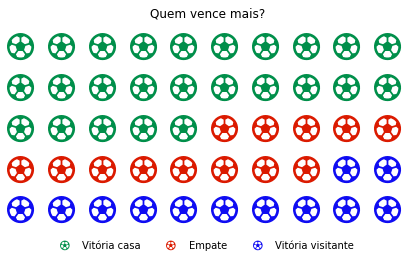

In [280]:
#Dados para o gráfico
dados = {'Vitória casa':data1['M'],'Empate':data1['E'],'Vitória visitante':data1['V']}

#Gerando gráfico Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=dados,
    title={
        'label': 'Quem vence mais?',
        'loc': 'center',
        'fontdict': {
                    'fontname':"Lato",
                    'size':12,
        }
    },
    legend={'loc': 'lower left', 'bbox_to_anchor': (0.095, -0.2),'ncol': len(data1),'framealpha': 0},
    vertical=True,
    starting_location='NW',
    icons = "futbol",
    icon_style = "regular",
    icon_legend=True,
    colors = ['#008F4A','#DB1A00','#0F0CF2']
)
plt.show()

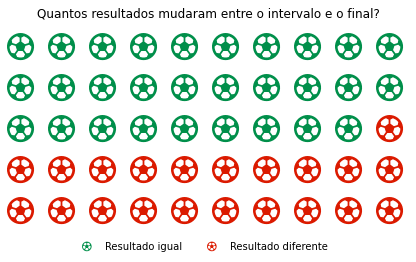

In [284]:
#Dados para o gráfico
data2 = {'Resultado igual' : igual, 'Resultado diferente': diferente}
#Gerando gráfico Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=data2,
    title={
        'label': 'Quantos resultados mudaram entre o intervalo e o final?',
        'loc': 'center',
        'fontdict': {
                    'fontname':"Lato",
                    'size':12,
        }
    },
    legend={'loc': 'lower left', 'bbox_to_anchor': (0.15, -0.2),'ncol': len(data2),'framealpha': 0},
    vertical=True,
    starting_location='NW',
    icons = "futbol",
    icon_style = "regular",
    icon_legend=True,
    colors = ['#008F4A','#DB1A00']
)
plt.show()

In [283]:
diferente/(igual+diferente)

0.41842105263157897